In [1]:
# import all the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import pickle

In [2]:
#Load testing file
test_file = open("CSV_files/Testing_file.csv","rb")
x_test = pickle.load(test_file)
y_test = pickle.load(test_file) 
x_test.shape, y_test.shape

((80, 2), (80,))

### Load train model

In [3]:
file1 = open('Train_model.pickle','rb')
classifier = pickle.load(file1)
sc = pickle.load(file1)
gridsearch = pickle.load(file1)
file1.close()

In [4]:
x_test = sc.transform(x_test)


### Prediction

In [5]:
# predict y data
y_pred = classifier.predict(x_test)

In [6]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 1 21]]


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



### GridSearch Model

In [9]:
gridsearch = gridsearch.fit(x_test, y_test)
best_accuracy = gridsearch.best_score_
best_parameter = gridsearch.best_params_

/home/admin1/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
best_accuracy, best_parameter

(0.9625, {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'})

### Visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


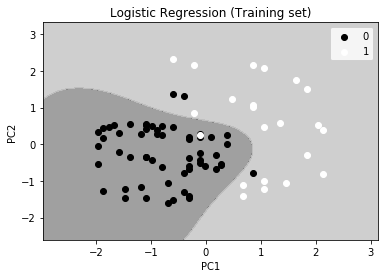

In [11]:
X_set, Y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('0.5', '0.75')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('0', '1'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()